# MNIST for Hand Gesture_Explore Clustering_Techniques 

MNIST Hand Gesture Image data set is a handwritten digits which is popular benchmark for Image-base machine learning methods. The MNIST Data is presented in a .CSV format with labels and pixel values in single rows. 
The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).
The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). 

The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.


k-means clustering is a method of vector quantization, that is popular for cluster analysis in data mining. 
k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

Firstly we will explore K means clustering algorithms listed below for the training data set.
1. Hartigan-Wong 
2. Lloyd
3. Forgy
4. MacQueen

Here are the sequence of steps to process training data using K-Means clustering:
1. Import / read data 
2. Review and understand Mnist Sign data set
3. Preprocess data (Scaling and centering data )
4. Use Different clustering techniques to measure performance
5. Conclusion



In [13]:
# Import required libraries
library(vcd)     # For association plots
library(readr)   # read_csv() is fast read facility
library(mclust)
library(dplyr)    # For data manipulation ,filtering etc
library(caret)    # For dummy variables, nearZeroVar(), findCorrleation()
library(ggplot2)  # For plotting
library(cluster) # # clustering algorithms
library(NbClust)  # For deciding # of clusters
library(tidyverse)  # data manipulation
library(factoextra)

Parsed with column specification:
cols(
  .default = col_integer()
)
See spec(...) for full column specifications.


[1] 27455   785

[1] 255

[1] 0

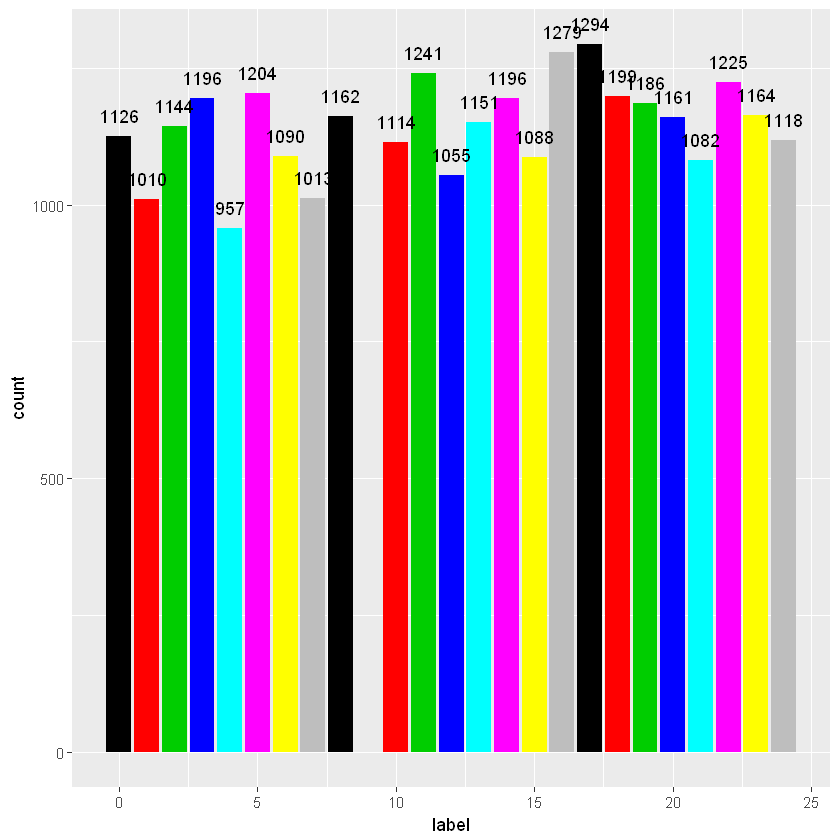

In [14]:
# Set Working Directory 
setwd("C:\\Users\\vikandul\\Desktop\\BIG DATA - FORE SCHOOL COURSE\\Class Notes and Supporting documentation\\Week_06022018\\clustering\\Excercise\\Clustering Excercise 2")
sign_mnist<-read_csv("sign_mnist_train.csv")

# Display Data set dimensions
dim(sign_mnist)
# Maximum value of the data set
max(sign_mnist)
# Minimun value of the data set
min(sign_mnist)

#Plot count of data points for each aplhabet sign available in the data set.
ggplot(data=sign_mnist, aes(x=label))+geom_bar(fill= c(1:24))  +geom_text(stat='count', aes(label=..count..),vjust = -1)





[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

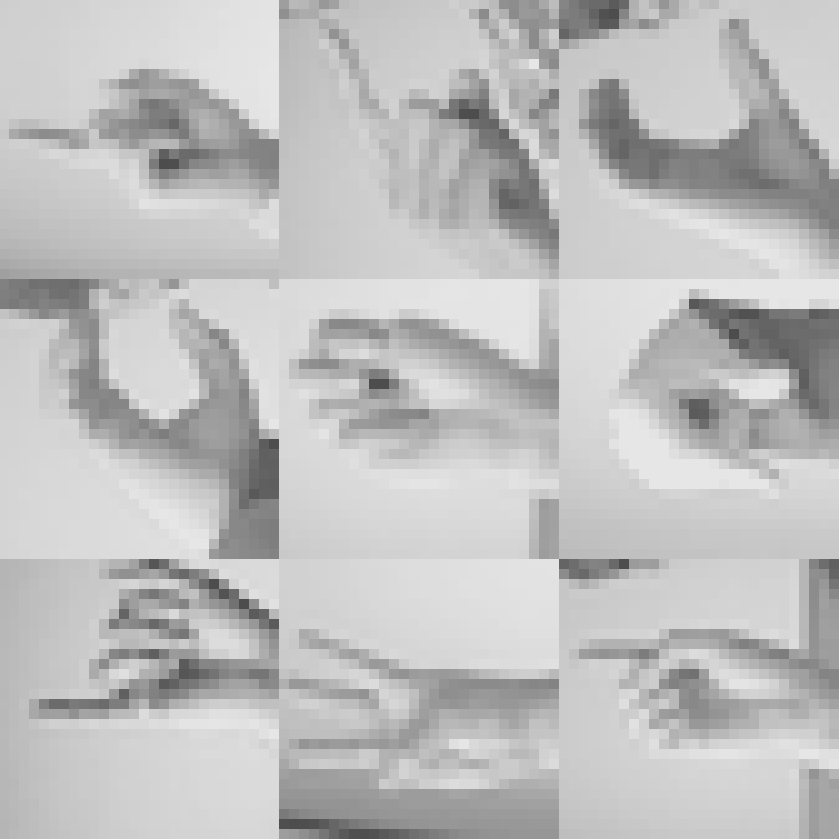

In [15]:

# Create an R-Graphics Window
 
# Divide plot-space, into 3 X 3 panels
#      Lay fig row-wise: mfrow()->M(m)ulti F(f)igure 
#      mar = rep(0,4) sets c(bottom, left, top, right)
#      all margins to zero to make space

par(mfrow=c(3,3), mar = rep(0, 4)) 

# 3.3 Display images usin image() from images 1 to 9
#     Flattened image is reshaped row-wise in 28 X 28 matrix
#     1st column is image label & not part of image
lapply(1:9, 
       function(x) image(
         matrix(unlist(sign_mnist[x,-1]),ncol = 28,byrow = T),
         col=grey.colors(255),    # Select 255 grey levels
         axes = FALSE
       )
)

In [16]:
# Scaling the data set
# the Minimum and maximum values of the data set are ranging between 0 and 255 hence we will scale the data(Between 0 and 1 ) by dividing each pixel/color values by 255(Max Value) and create a model data set. 
# While scaling the data set we need to exclude label column

model_data<-sign_mnist[,-1]/255
head(model_data)
# you can see that all pixel / color values of the data set are scaled and Min and Max values of the model data is 0 and 1
min(model_data)
max(model_data)

pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7   
1 0.4196078 0.4627451 0.4980392 0.5254902 0.5450980 0.5607843 0.5725490
2 0.6078431 0.6156863 0.6117647 0.6117647 0.6117647 0.6156863 0.6117647
3 0.7333333 0.7372549 0.7372549 0.7333333 0.7333333 0.7294118 0.7333333
4 0.8274510 0.8274510 0.8313725 0.8313725 0.8274510 0.8235294 0.8274510
5 0.6431373 0.6549020 0.6666667 0.6745098 0.6901961 0.7019608 0.7058824
6 0.6313725 0.6588235 0.6745098 0.6784314 0.6980392 0.7215686 0.7411765
  pixel8    pixel9    pixel10   ... pixel775  pixel776  pixel777  pixel778 
1 0.5882353 0.6000000 0.6117647 ... 0.8117647 0.8117647 0.8117647 0.8117647
2 0.6196078 0.6196078 0.6156863 ... 0.2705882 0.5843137 0.5019608 0.3411765
3 0.7372549 0.7333333 0.7294118 ... 0.7921569 0.7882353 0.7843137 0.7803922
4 0.8235294 0.8235294 0.8274510 ... 0.9215686 0.9176471 0.9137255 0.9058824
5 0.7215686 0.7254902 0.7294118 ... 0.3607843 0.4117647 0.4117647 0.4235294
6 0.7568627 0.7686275 0.7921569 ... 0.2980392 0.2901961 0.2666667 0.2431373
  pixel779  pixel780  pixel781  pixel782  pixel783  pixel784 
1 0.8078431 0.8078431 0.8078431 0.8000000 0.7960784 0.7921569
2 0.3686275 0.6392157 0.6862745 0.4039216 0.5294118 0.5843137
3 0.7764706 0.7803922 0.7764706 0.7647059 0.7607843 0.7647059
4 0.9019608 0.8862745 0.8823529 0.8705882 0.8980392 0.6392157
5 0.5215686 0.6392157 0.6156863 0.6392157 0.6431373 0.7019608
6 0.2078431 0.2156863 0.1882353 0.9333333 1.0000000 1.0000000

[1] 0

[1] 1

In [17]:
# lets start clustering model data using Hartigan-Wong  Algorithm
# we will record the run time to cluster the sign data set using Hartigan-Wong algorithm

start.time <- Sys.time()
hwong_cl<-kmeans(model_data, centers = 24, nstart = 10, iter.max = 500, algorithm ="Hartigan-Wong")
Sys.time() - start.time
hwong_cl

Time difference of 4.936028 mins

Hartigan-Wong Algorithm took almost 5 mins to build k means clustering. 

The sum of square 

In [18]:
hwong_df<-data.frame(predicted = hwong_cl$cluster, actual = sign_mnist$label)
print(hwong_df)

      predicted actual
1             2      3
2             2      6
3             1      2
4            15      2
5            21     13
6            22     16
7            16      8
8            20     22
9             9      3
10            3      3
11           10     18
12            4     10
13           23     16
14           20     22
15           16     20
16           20     16
17           10     17
18           13     13
19           11     13
20           18     19
21           16     18
22           17     21
23           24     16
24           20     23
25           16      3
26           17     23
27            2     24
28            6     18
29           20     22
30           17      1
31           10      1
32            6     12
33            1      2
34            7      6
35            8      2
36            2     12
37           24     23
38            1      2
39           13      3
40            5     13
41            9     11
42           23     15
43         

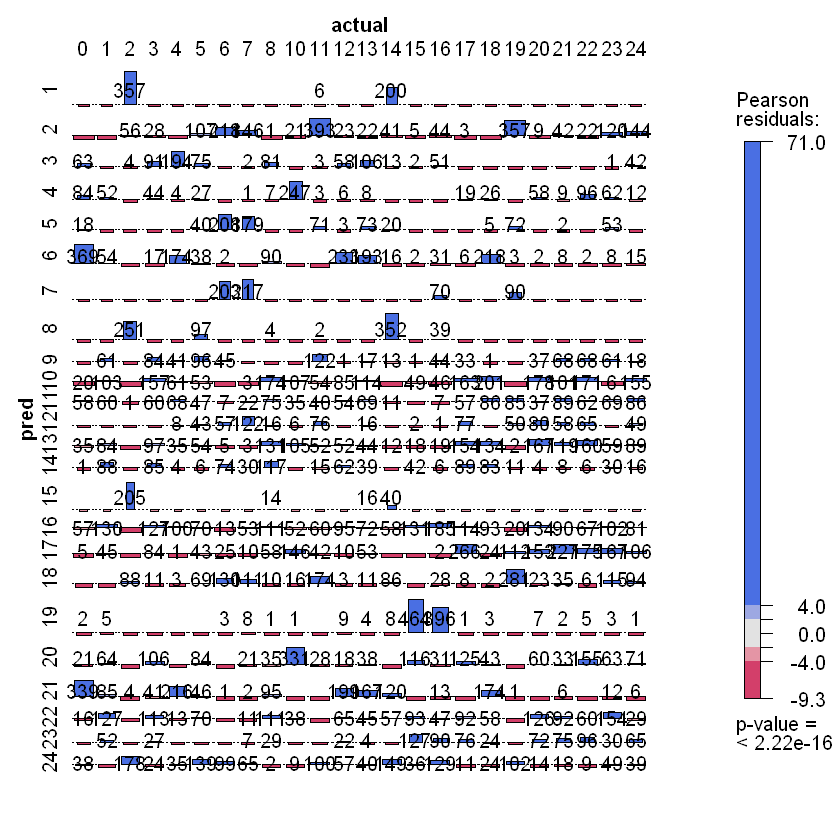

In [19]:
# 8. Create an association plot to see association
#     Finds association between predicted and actual values
hwong_tb<-table(pred=hwong_df$predicted,actual=hwong_df$actual)
assoc(hwong_tb, shade = T, labeling = labeling_values)


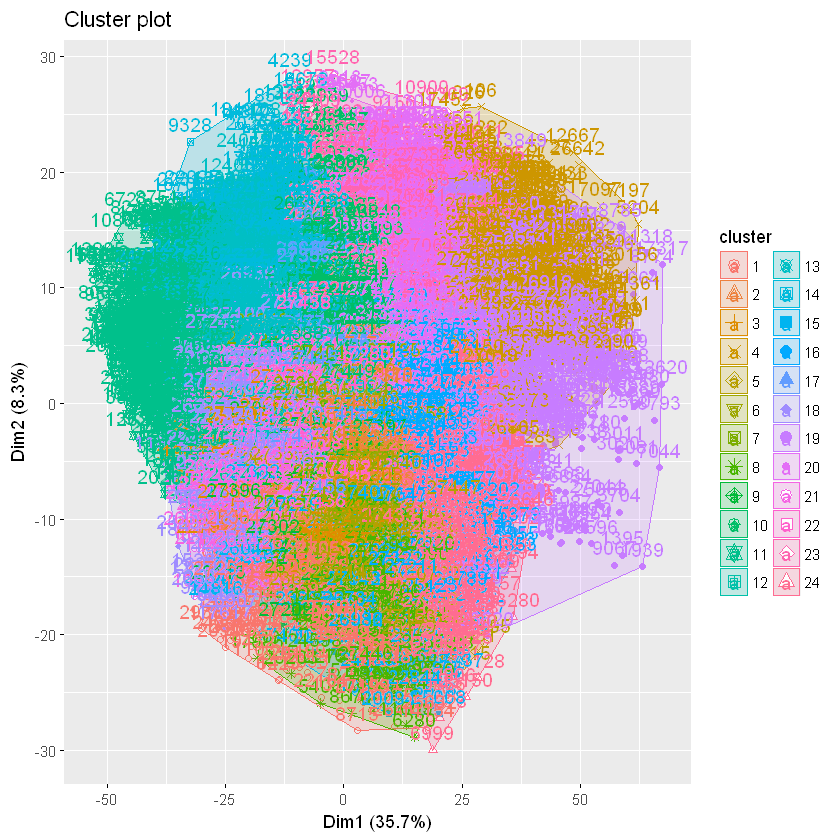

In [47]:
fviz_cluster(hwong_cl, data = sign_mnist)

In [20]:
# lets start clustering model data using Lloyd  Algorithm
# we will record the run time to cluster the sign data set using Lloyd algorithm

start.time <- Sys.time()
Lloyd_cl<-kmeans(model_data, centers = 24, nstart = 10, iter.max = 500, algorithm ="Lloyd")
Sys.time() - start.time

Time difference of 27.20798 mins

In [21]:
Lloyd_df<-data.frame(predicted = Lloyd_cl$cluster, actual = sign_mnist$label)
print(Lloyd_df)

      predicted actual
1            16      3
2            16      6
3            24      2
4             8      2
5            18     13
6            17     16
7            15      8
8             4     22
9            14      3
10           22      3
11           14     18
12           20     10
13           23     16
14            4     22
15           15     20
16           15     16
17           14     17
18            3     13
19           18     13
20           12     19
21           15     18
22           14     21
23           19     16
24           16     23
25           15      3
26           16     23
27           16     24
28            1     18
29            4     22
30            7      1
31           15      1
32           14     12
33           24      2
34            2      6
35            7      2
36           16     12
37            4     23
38           24      2
39            3      3
40            9     13
41            9     11
42           11     15
43         

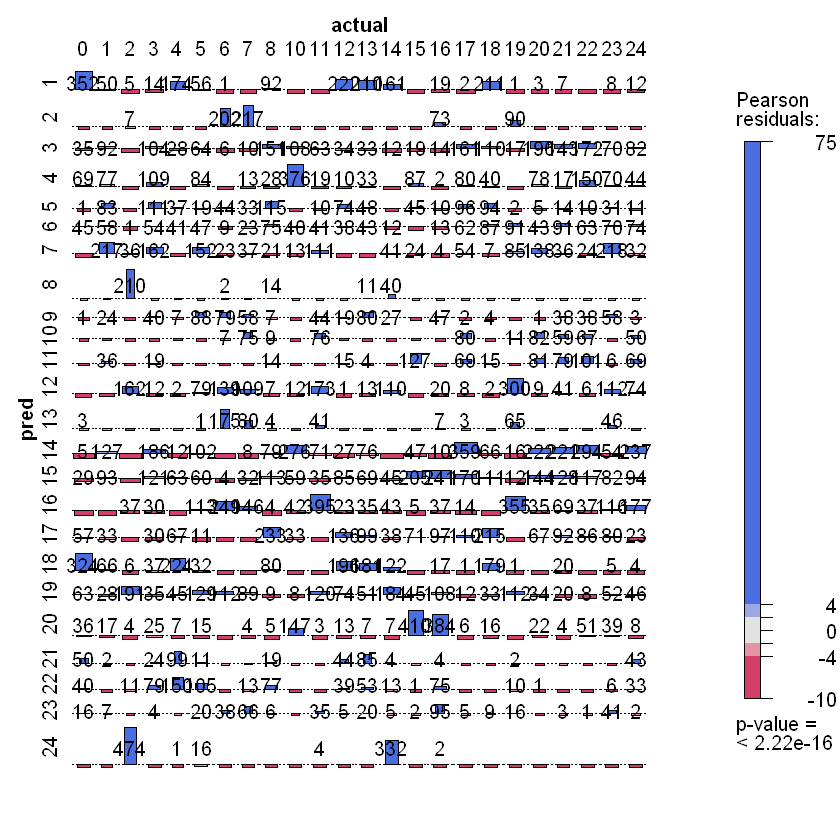

In [22]:
 #   Finds association between predicted and actual values
Lloyd_tb<-table(pred=Lloyd_df$predicted,actual=Lloyd_df$actual)
assoc(Lloyd_tb, shade = T, labeling = labeling_values)

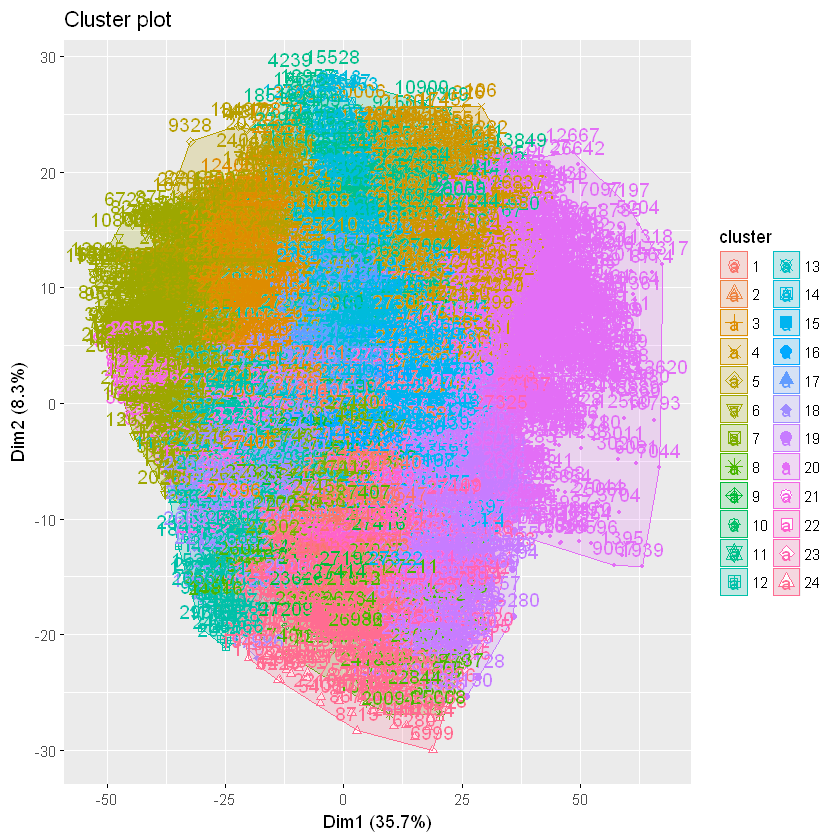

In [48]:
fviz_cluster(Lloyd_cl, data = sign_mnist)

In [23]:
# lets start clustering model data using Forgy  Algorithm
# we will record the run time to cluster the sign data set using Forgy algorithm

start.time <- Sys.time()
Forgy_cl<-kmeans(model_data, centers = 24, nstart = 10, iter.max = 500, algorithm ="Forgy")
Sys.time() - start.time

Time difference of 17.03196 mins

In [24]:
Forgy_df<-data.frame(predicted = Forgy_cl$cluster, actual = sign_mnist$label)
print(Forgy_df)

      predicted actual
1            16      3
2            16      6
3            14      2
4            13      2
5             2     13
6            11     16
7            21      8
8            23     22
9             4      3
10           15      3
11           24     18
12           17     10
13           12     16
14           23     22
15           21     20
16           12     16
17           24     17
18            8     13
19            5     13
20           10     19
21           21     18
22           20     21
23            6     16
24           23     23
25           21      3
26           20     23
27           16     24
28            1     18
29           23     22
30           20      1
31           24      1
32            2     12
33           14      2
34           19      6
35            2      2
36           16     12
37           23     23
38           14      2
39            4      3
40            3     13
41            4     11
42           12     15
43         

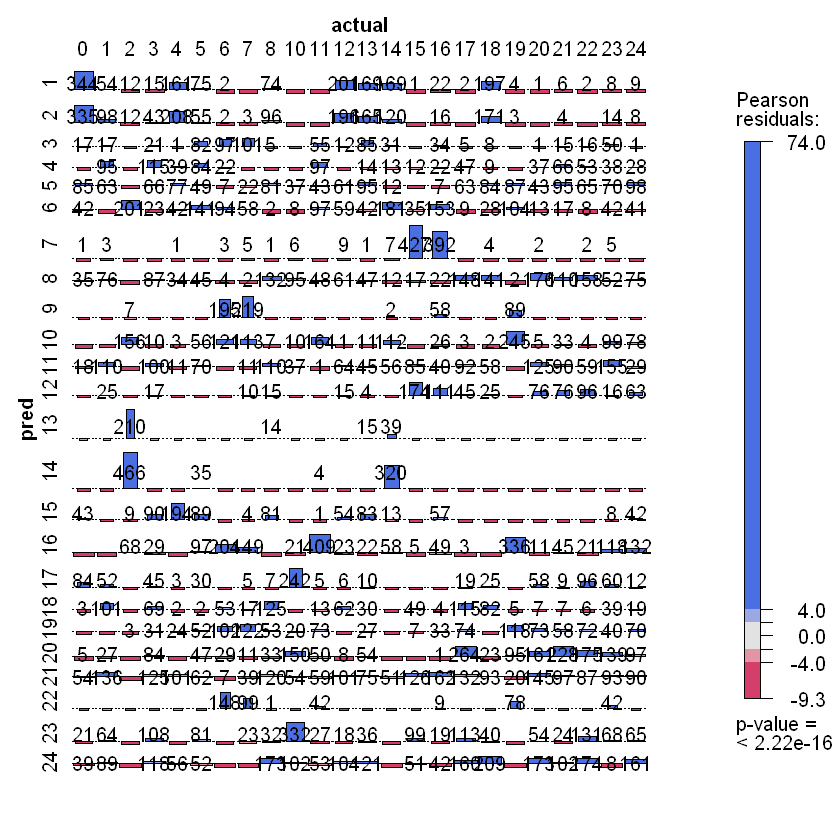

In [25]:
  #  Finds association between predicted and actual values
Forgy_tb<-table(pred=Forgy_df$predicted,actual=Forgy_df$actual)
assoc(Forgy_tb, shade = T, labeling = labeling_values)


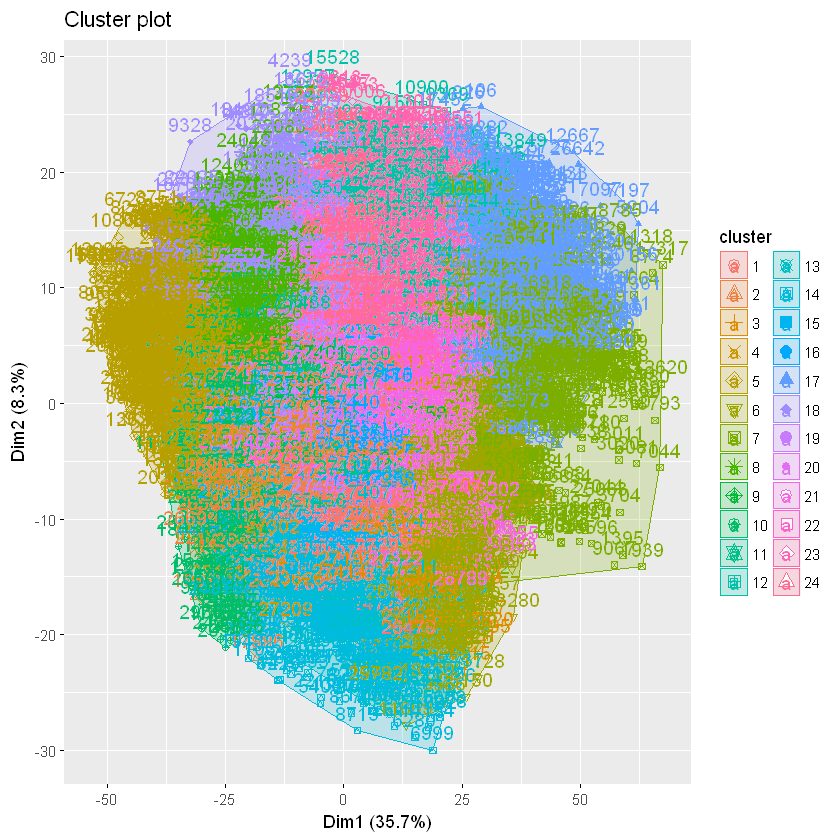

In [50]:
fviz_cluster(Forgy_cl, data = sign_mnist)

In [26]:
# lets start clustering model data using MacQueen  Algorithm
# we will record the run time to cluster the sign data set using MacQueen algorithm

start.time <- Sys.time()
MacQueen_cl<-kmeans(model_data, centers = 24, nstart = 10, iter.max = 500, algorithm ="MacQueen")
Sys.time() - start.time

Time difference of 8.148701 mins

In [27]:
MacQueen_df<-data.frame(predicted = MacQueen_cl$cluster, actual = sign_mnist$label)
print(MacQueen_df)

      predicted actual
1             8      3
2            22      6
3             1      2
4            13      2
5             2     13
6            11     16
7            10      8
8            21     22
9            20      3
10           16      3
11           24     18
12           15     10
13           23     16
14           21     22
15           10     20
16           19     16
17           24     17
18            6     13
19            5     13
20            8     19
21           10     18
22           21     21
23           14     16
24           21     23
25           21      3
26            8     23
27           14     24
28           17     18
29           19     22
30            8      1
31           24      1
32           17     12
33            1      2
34           12      6
35            8      2
36           22     12
37           14     23
38            1      2
39            6      3
40            3     13
41           20     11
42           23     15
43         

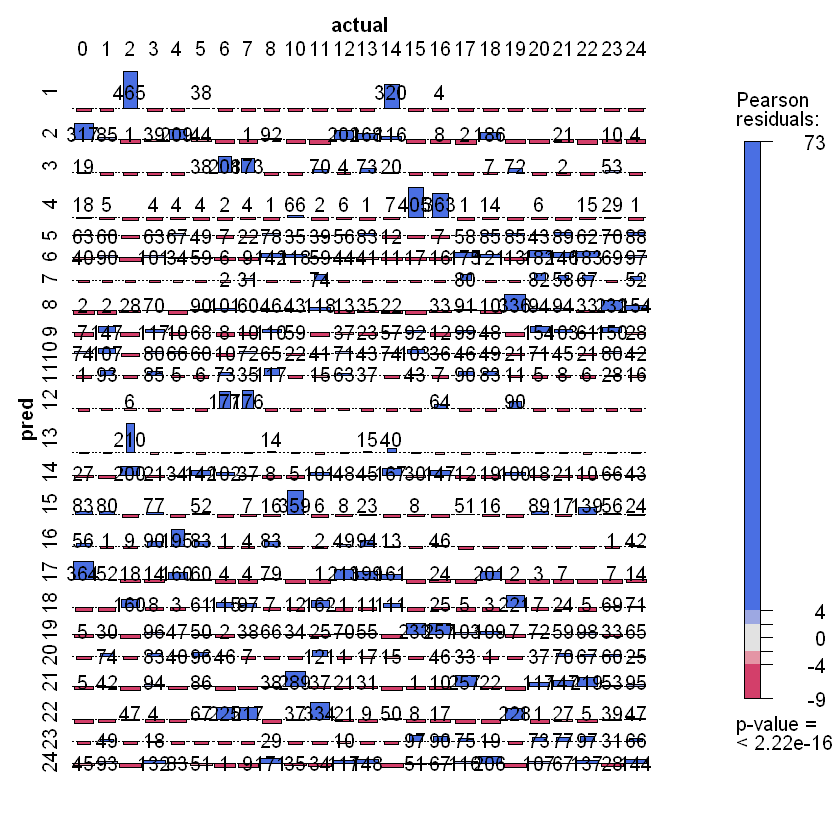

In [28]:
 #   Finds association between predicted and actual values
MacQueen_tb<-table(pred=MacQueen_df$predicted,actual=MacQueen_df$actual)
assoc(MacQueen_tb, shade = T, labeling = labeling_values)

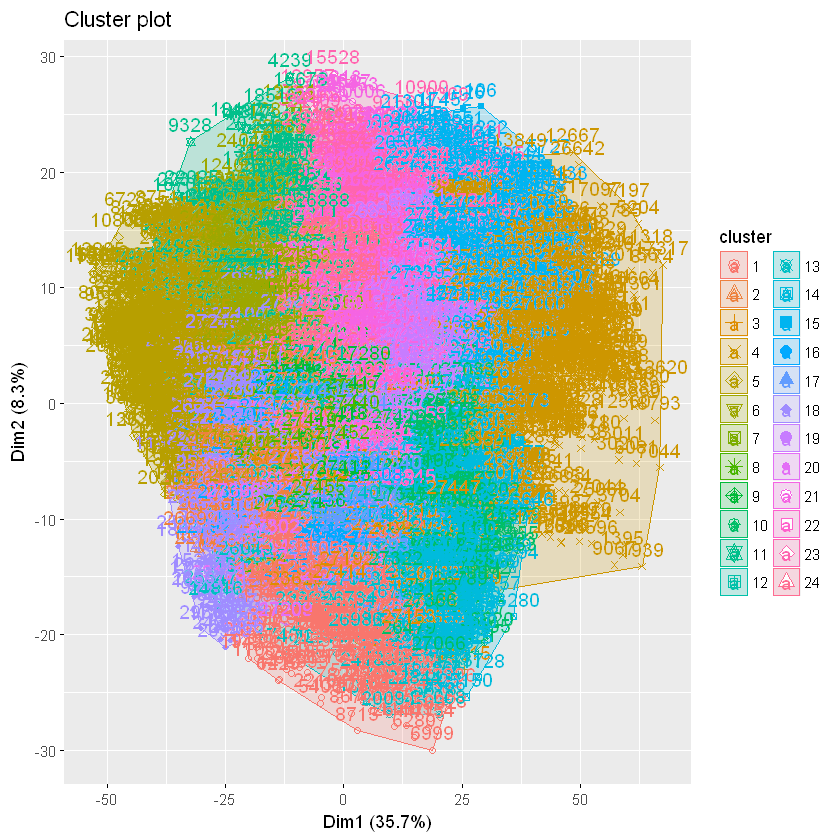

In [49]:
fviz_cluster(MacQueen_cl, data = sign_mnist)

Now that we have completed clustering using 4 algorithms lets review the total run time of each algorithms : 

Hartigan-Wong :  4.936028 mins
        Lloyd :  27.20798 mins
        Forgy :  17.03196 mins
     MacQueen :  8.148701 mins

Based on the run time Hartigan-Wong algorithm is better performance wise.


Lets try to derive Clusters values of each K means clustering technique and plot Actual Vs Predicted and review how close the predicted values are.

In [44]:
actual_sign_values <-sign_mnist%>%group_by(label )%>% count()
actual_sign_values<- cbind(actual_sign_values$label,  actual_sign_values$n, 
                           data.frame(hwong_cl$size), data.frame(Lloyd_cl$size), data.frame(Forgy_cl$size), data.frame(MacQueen_cl$size))



Act_Pred_df<-data.frame(labels = actual_sign_values$`actual_sign_values$label`, actual = actual_sign_values$`actual_sign_values$n`
                    , predicted_hwong = actual_sign_values$hwong_cl.size
                    , predicted_Lloyd = actual_sign_values$Lloyd_cl.size
                    , predicted_Forgy = actual_sign_values$Forgy_cl.size
                    , predicted_MacQueen = actual_sign_values$MacQueen_cl.size)

Act_Pred_df

labels actual predicted_hwong predicted_Lloyd predicted_Forgy
1   0     1126    563            1600            1528           
2   1     1010   1802             589            1549           
3   2     1144    786            1724             654           
4   3     1196    765            1386             791           
5   4      957    744             893            1310           
6   5     1204   1481            1121            1440           
7   6     1090    580            1435             869           
8   7     1013    745             277            1579           
9   8     1162    811             665             570           
10 10     1114   2001             516            1259           
11 11     1241   1185             635            1366           
12 12     1055    726            1391             768           
13 13     1151   1630             425             278           
14 14     1196    816            2495             825           
15 15     1088    275            2112             768           
16 16     1279   2015            1962            1800           
17 17     1294   1754            1578             768           
18 18     1199   1304            1495             810           
19 19     1186    923            1608            1052           
20 20     1161   1443            1230            1681           
21 21     1082   1527             387            2029           
22 22     1225   1417             706             419           
23 23     1164    796             396            1355           
24 24     1118   1366             829            1987           
   predicted_MacQueen
1   827              
2  1505              
3   739              
4   958              
5  1221              
6  1773              
7   446              
8  1707              
9  1400              
10 1299              
11  827              
12  513              
13  279              
14 1403              
15 1111              
16  769              
17 1587              
18 1178              
19 1554              
20  839              
21 1564              
22 1383              
23  731              
24 1842

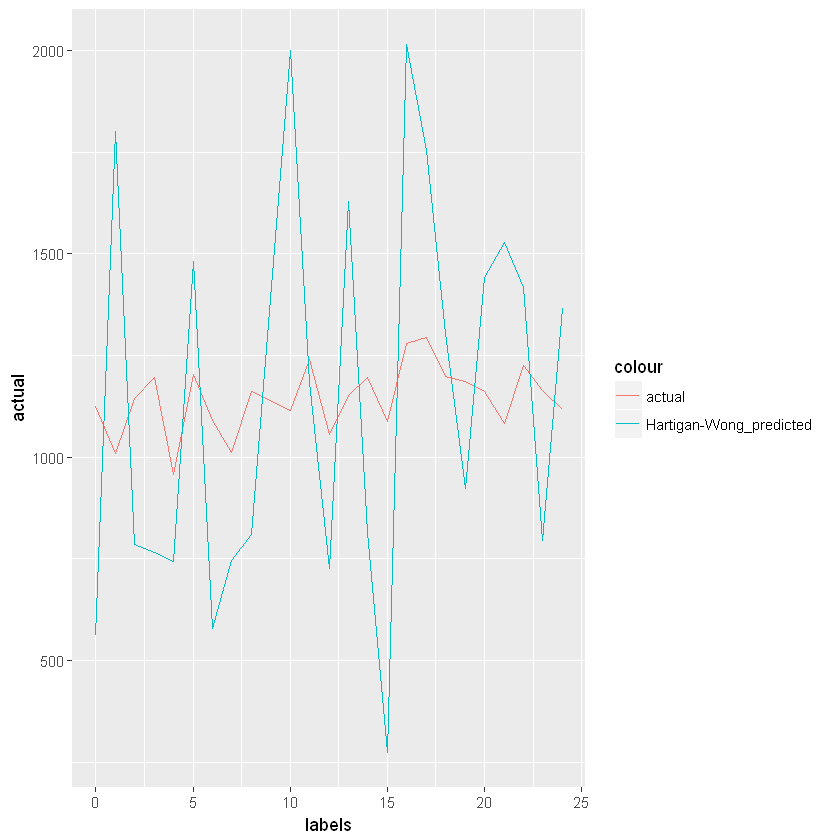

In [40]:

ggplot(Act_Pred_df, aes(labels)) + 
    geom_line(aes(y = actual, colour = "actual")) + 
  geom_line(aes(y = predicted_hwong, colour = "Hartigan-Wong_predicted"))

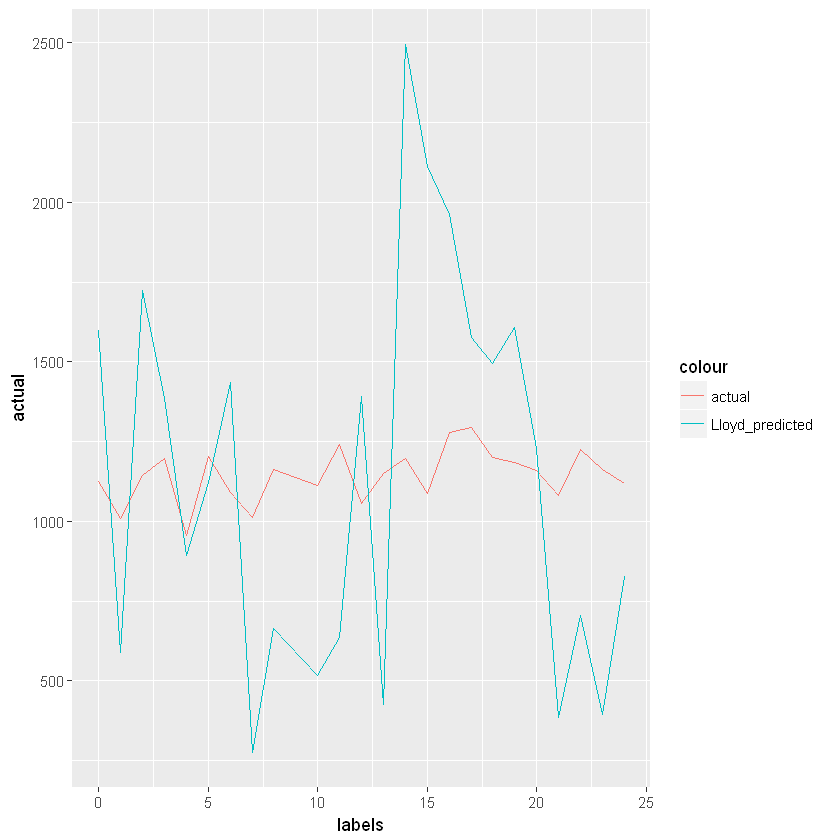

In [41]:
ggplot(Act_Pred_df, aes(labels)) + 
    geom_line(aes(y = actual, colour = "actual")) + 
  geom_line(aes(y = predicted_Lloyd, colour = "Lloyd_predicted"))

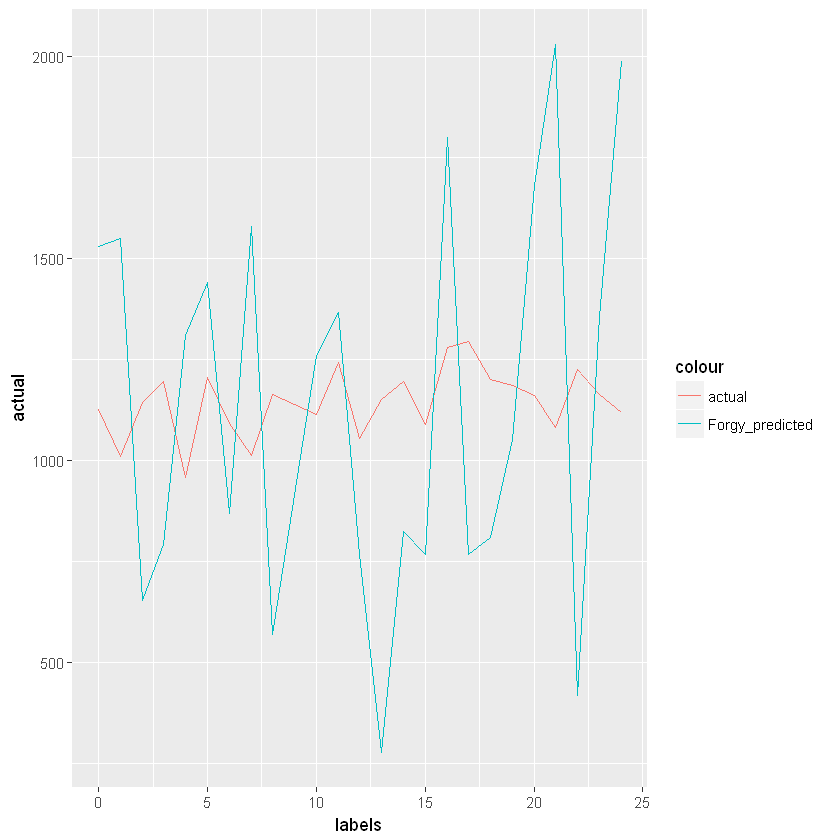

In [42]:
ggplot(Act_Pred_df, aes(labels)) + 
    geom_line(aes(y = actual, colour = "actual")) + 
  geom_line(aes(y = predicted_Forgy, colour = "Forgy_predicted"))

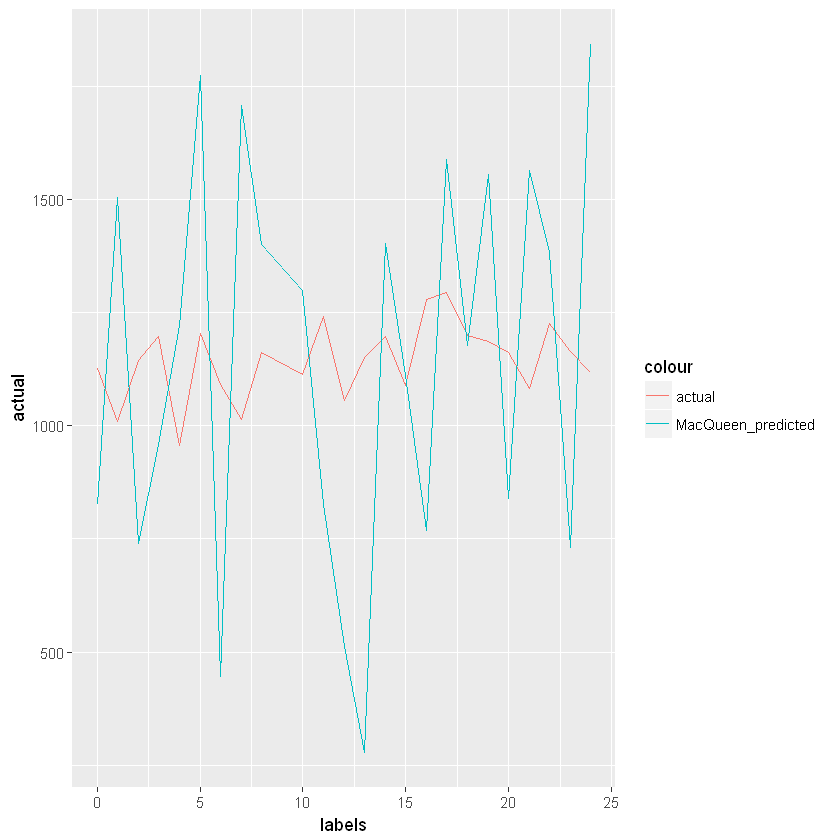

In [43]:
ggplot(Act_Pred_df, aes(labels)) + 
    geom_line(aes(y = actual, colour = "actual")) + 
  geom_line(aes(y = predicted_MacQueen, colour = "MacQueen_predicted"))

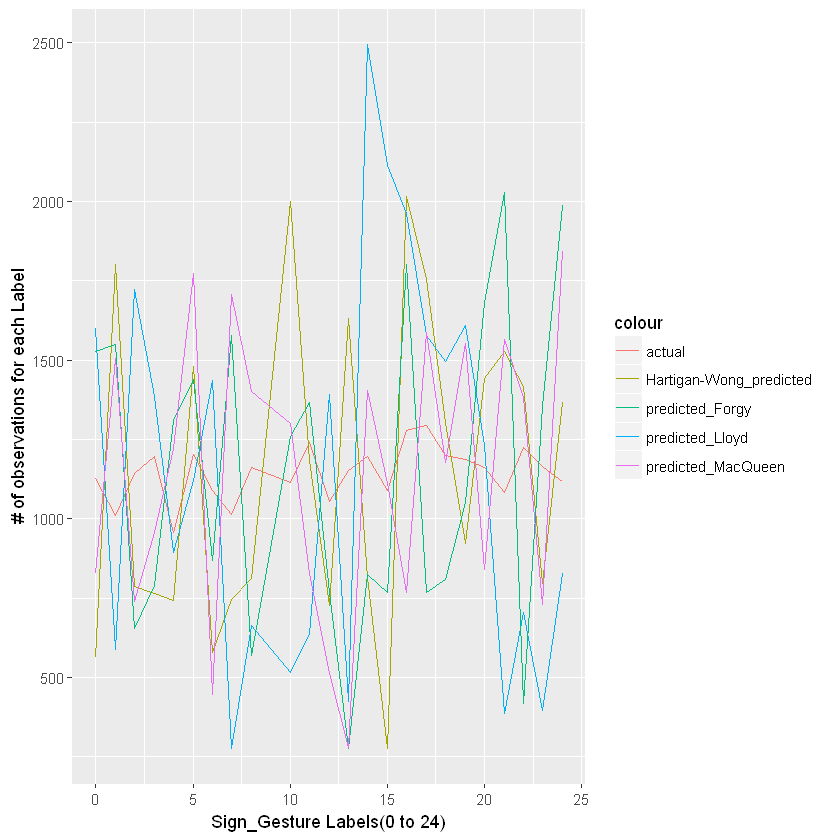

In [52]:
par(mfrow=c(1,1)) 

ggplot(Act_Pred_df, aes(labels)) + 
    geom_line(aes(y = actual, colour = "actual")) + 
  geom_line(aes(y = predicted_hwong, colour = "Hartigan-Wong_predicted"))+
geom_line(aes(y = predicted_Lloyd, colour = "predicted_Lloyd"))+
geom_line(aes(y = predicted_Forgy, colour = "predicted_Forgy"))+
geom_line(aes(y = predicted_MacQueen, colour = "predicted_MacQueen"))+
 labs(x="Sign_Gesture Labels(0 to 24)", y= "# of observations for each Label")




In [54]:
hwong_cl

# The between_SS / total_SS) is   47.7 %

K-means clustering with 24 clusters of sizes 563, 1802, 786, 765, 744, 1481, 580, 745, 811, 2001, 1185, 726, 1630, 816, 275, 2015, 1754, 1304, 923, 1443, 1527, 1417, 796, 1366

Cluster means:
      pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7
1  0.6820186 0.6882736 0.6933932 0.6973287 0.7007209 0.7039529 0.7069202
2  0.5699441 0.5826750 0.5939718 0.6024265 0.6099758 0.6160149 0.6217623
3  0.7022601 0.7088410 0.7154069 0.7203912 0.7246320 0.7287432 0.7313775
4  0.2284045 0.2502268 0.2227656 0.2083045 0.2396463 0.2466641 0.2695579
5  0.6576007 0.6670831 0.6769397 0.6868174 0.6939911 0.6996205 0.7046437
6  0.5892706 0.5977757 0.6055315 0.6118468 0.6180720 0.6234897 0.6286584
7  0.6698715 0.6779986 0.6851927 0.6928668 0.6990196 0.7033739 0.7070385
8  0.6113331 0.6193710 0.6264614 0.6326675 0.6373154 0.6421792 0.6455534
9  0.6256183 0.6354440 0.6454196 0.6530645 0.6596746 0.6649936 0.6692391
10 0.5185505 0.5370276 0.5545894 0.5685353 0.5828262 0.5965703 0.6082312
11 0.

In [55]:
Lloyd_cl
# The between_SS / total_SS) is   47.6 %

K-means clustering with 24 clusters of sizes 1600, 589, 1724, 1386, 893, 1121, 1435, 277, 665, 516, 635, 1391, 425, 2495, 2112, 1962, 1578, 1495, 1608, 1230, 387, 706, 396, 829

Cluster means:
      pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7
1  0.5882647 0.5973971 0.6059093 0.6126176 0.6192868 0.6251299 0.6298627
2  0.6715004 0.6794700 0.6864476 0.6938180 0.6997037 0.7038916 0.7073671
3  0.6548815 0.6685228 0.6816637 0.6929098 0.7032050 0.7124903 0.7201560
4  0.2934980 0.3149054 0.3162550 0.3210056 0.3521291 0.3754944 0.3991342
5  0.6358299 0.6541071 0.6715192 0.6862350 0.6999275 0.7112531 0.7224777
6  0.7853387 0.7948995 0.8039391 0.8116668 0.8184709 0.8243305 0.8294905
7  0.6247182 0.6317633 0.6385079 0.6437275 0.6472829 0.6502699 0.6518549
8  0.7103844 0.7125221 0.7141077 0.7166702 0.7176187 0.7183125 0.7173498
9  0.6628571 0.6707239 0.6781896 0.6846410 0.6901371 0.6944066 0.6981041
10 0.6960100 0.6981684 0.7002508 0.7021888 0.7035568 0.7048944 0.7055252
11 0

In [56]:
Forgy_cl
# The between_SS / total_SS) is   47.8 %

K-means clustering with 24 clusters of sizes 1528, 1549, 654, 791, 1310, 1440, 869, 1579, 570, 1259, 1366, 768, 278, 825, 768, 1800, 768, 810, 1052, 1681, 2029, 419, 1355, 1987

Cluster means:
      pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7
1  0.5979160 0.6060030 0.6135227 0.6192716 0.6247716 0.6296350 0.6339288
2  0.7053304 0.7125685 0.7193129 0.7246623 0.7299232 0.7342625 0.7380802
3  0.6398393 0.6475745 0.6549080 0.6616178 0.6670145 0.6712598 0.6753553
4  0.6493592 0.6586649 0.6680945 0.6750651 0.6803599 0.6839493 0.6878065
5  0.7846610 0.7940698 0.8027451 0.8100254 0.8164257 0.8219488 0.8269511
6  0.4682435 0.4819390 0.4935757 0.5031427 0.5113154 0.5178159 0.5274864
7  0.3097092 0.3072542 0.3253999 0.3243665 0.3361538 0.3487082 0.3627203
8  0.6568988 0.6708118 0.6840318 0.6954861 0.7060686 0.7158092 0.7239255
9  0.6660681 0.6742759 0.6815686 0.6891916 0.6954042 0.6997867 0.7036326
10 0.7353455 0.7445561 0.7523774 0.7588562 0.7646405 0.7689576 0.7731159
11 0

In [57]:
MacQueen_cl
# The between_SS / total_SS) is   47.6 %

K-means clustering with 24 clusters of sizes 827, 1505, 739, 958, 1221, 1773, 446, 1707, 1400, 1299, 827, 513, 279, 1403, 1111, 769, 1587, 1178, 1554, 839, 1564, 1383, 731, 1842

Cluster means:
      pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7
1  0.6437063 0.6505916 0.6562724 0.6613083 0.6647272 0.6687389 0.6718354
2  0.7033679 0.7110104 0.7181838 0.7238564 0.7293701 0.7338206 0.7378360
3  0.6605535 0.6698082 0.6795617 0.6893311 0.6964950 0.7020669 0.7070339
4  0.2889148 0.2881330 0.2966351 0.2963650 0.3088501 0.3178722 0.3333374
5  0.7899054 0.7992003 0.8078367 0.8151306 0.8214803 0.8270495 0.8320021
6  0.6510976 0.6651294 0.6786194 0.6903487 0.7010119 0.7105582 0.7185694
7  0.6926405 0.6950936 0.6972655 0.6993757 0.7008001 0.7023916 0.7031390
8  0.6200650 0.6310348 0.6413867 0.6494251 0.6566135 0.6631517 0.6684425
9  0.6156863 0.6232157 0.6297115 0.6352437 0.6393193 0.6430504 0.6454342
10 0.5130915 0.5205301 0.5266163 0.5304442 0.5336201 0.5369560 0.5354919
11 

The Between Sum of squares by Total sum of squares distances for all 4 algorithm  is ~ 47.7